In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
T111=pd.read_csv('F:/Divya/New folder/data set/netflix_titles.csv')


In [4]:
print(T111.shape)
print(T111.isna().sum())
print(T111.info())

(6234, 12)
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)


In [5]:
T111.duplicated().sum()

0

In [6]:
T111.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [7]:
t11=T111.copy()
t11.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [8]:
t11['date_added']=pd.to_datetime(t11['date_added'])
t11['day_added']=t11['date_added'].dt.day
t11['year_added']=t11['date_added'].dt.year
t11['month_added']=t11['date_added'].dt.month

In [9]:
t11.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8.0,2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8.0,2018.0,9.0


In [10]:
t11=t11.dropna()
t11.shape

(3774, 15)

In [11]:
t11['day_added']=t11['day_added'].astype(int)
t11['year_added']=t11['year_added'].astype(int)
t11['month_added']=t11['month_added'].astype(int)

In [12]:
t11['season_count']=t11.apply(lambda x:x['duration'].split('  ')[0] if "Season"  in x['duration']  else '' , axis=1)
t11['duration']=t11.apply(lambda x:x['duration'].split('  ')[0] if "Season"  not in x['duration']  else '' , axis=1)
  

In [13]:
t11['duration']=t11['duration'].map(lambda x:x.rstrip('min'))

In [14]:
t11.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9,
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9,
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9,
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9,


In [15]:
writer=pd.ExcelWriter("net.xlsx")
t11.to_excel(writer)
writer.save()

## visualization

### Type - movie and TV shows

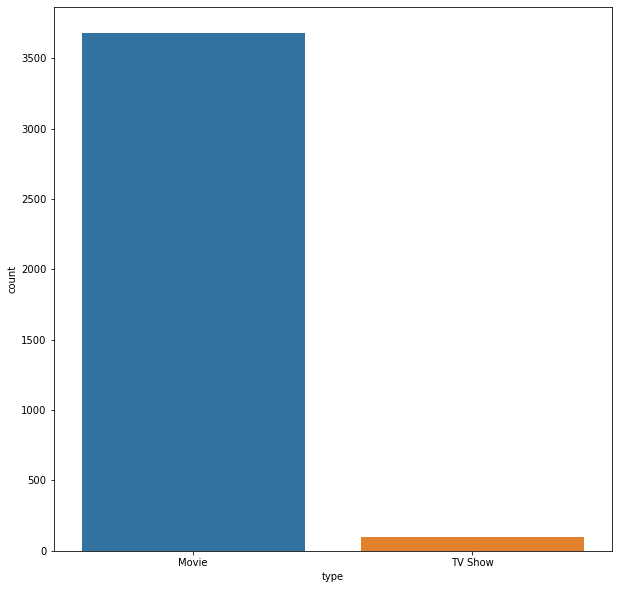

In [16]:
sns.countplot(t11['type'])
fig=plt.gcf()
fig.set_size_inches(10,10)

### Rating of shows and movies 

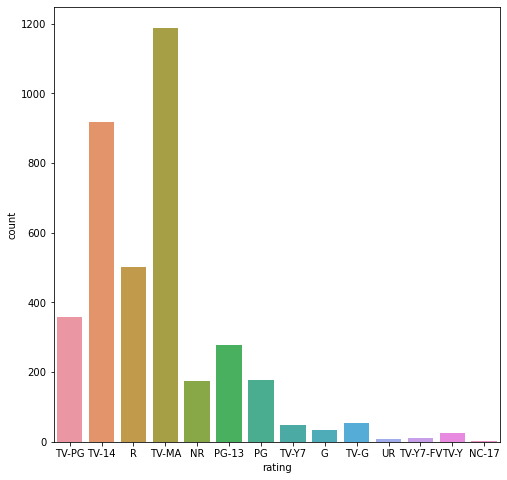

In [17]:
sns.countplot(t11['rating'])

fig=plt.gcf()
fig.set_size_inches(8,8)

### type with respect to rating 

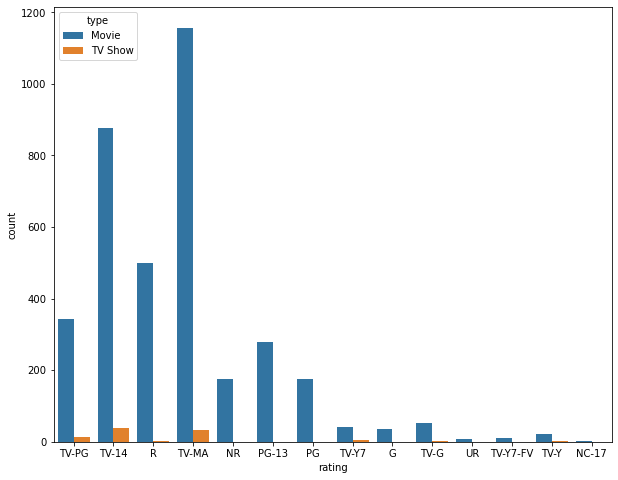

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=t11)
plt.show()

### rating ditrubution - pie chart 

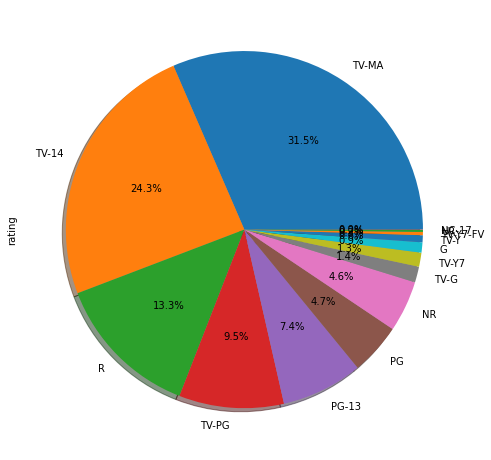

In [19]:
t11['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(8,10))
plt.show()

In [20]:
!pip install wordcloud
from wordcloud import WordCloud

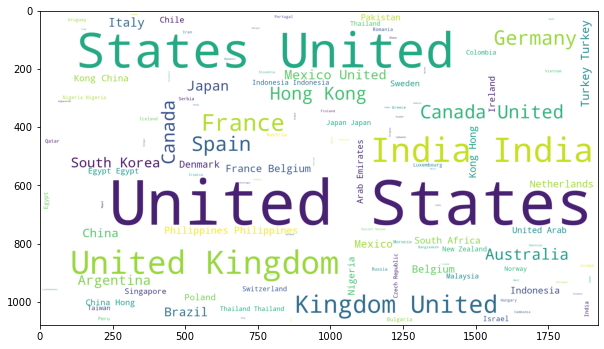

In [21]:
plt.subplots(figsize=(10,15))
wordcloud=WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(t11.country))
plt.imshow(wordcloud) 

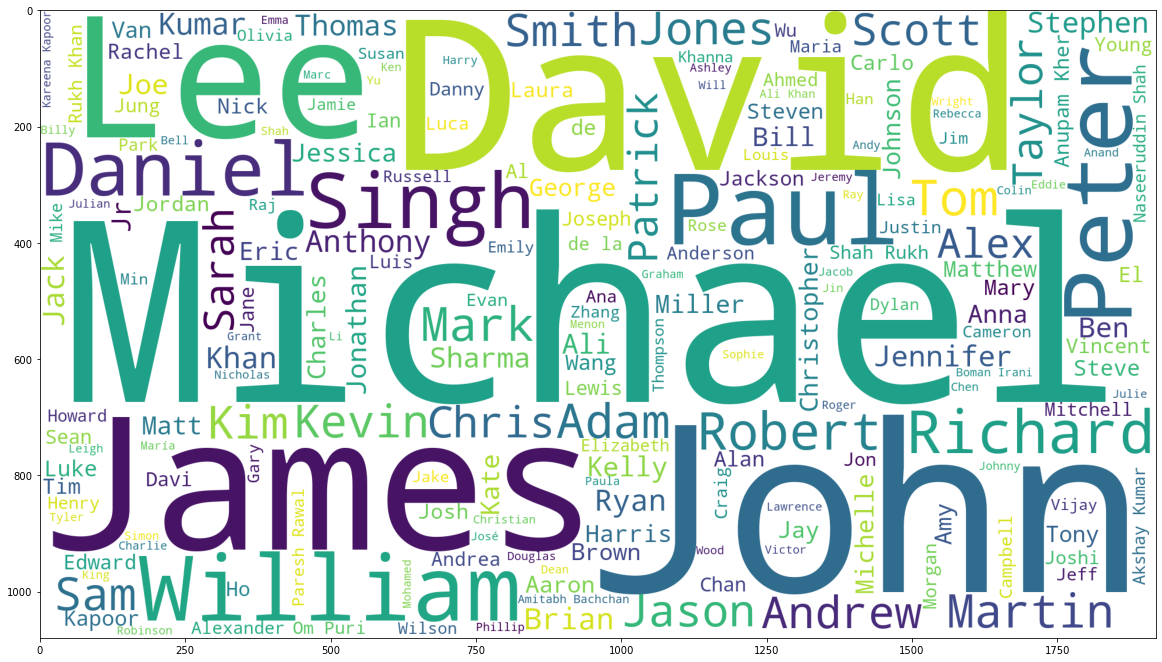

In [22]:
plt.subplots(figsize=(20,30))
wordcloud=WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(t11.cast))
plt.imshow(wordcloud)

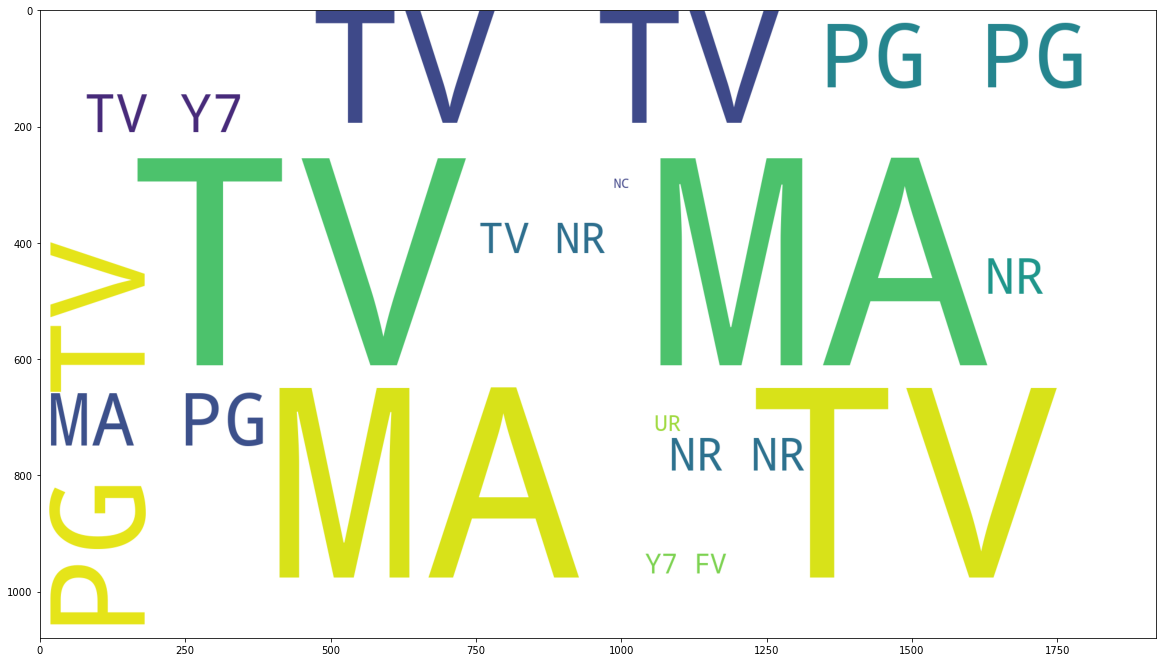

In [23]:
plt.subplots(figsize=(20,18))
wordcloud=WordCloud(background_color="white",width=1920,height=1080).generate(" ".join(t11.rating))
plt.imshow(wordcloud)


In [24]:
# Oldest movies on the Netflix

old=t11.sort_values("release_year",ascending=True)
old[['title','release_year']][:15]

,title,release_year
2013,The Battle of Midway,1942
2021,Tunisian Victory,1944
2005,Know Your Enemy - Japan,1945
2930,The Stranger,1946
2006,Let There Be Light,1946
2020,Thunderbolt,1947
2981,White Christmas,1954
1401,Rebel Without a Cause,1955
1369,Forbidden Planet,1956
1354,Cat on a Hot Tin Roof,1958


In [25]:
# oldest TV shows on netflix

old1=t11.sort_values('release_year',ascending=True)
old1=old1[old1['type']=='TV Show']
old1[['title','type','release_year']][:15]

,title,type,release_year
3864,Ken Burns: The Civil War,TV Show,1990
775,The Blue Planet: A Natural History of the Oceans,TV Show,2001
5566,Ouran High School Host Club,TV Show,2006
5330,Planet Earth: The Complete Collection,TV Show,2006
5633,Naruto,TV Show,2008
6024,Fullmetal Alchemist: Brotherhood,TV Show,2010
3272,Frozen Planet,TV Show,2011
4277,Geronimo Stilton,TV Show,2011
2015,The Fear,TV Show,2012
4742,Reply 1997,TV Show,2012


In [26]:
# movies /tv shows count

t11['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

In [27]:
# top 10 categories

cate=t11['listed_in'].value_counts()
cate.head(10)

Dramas, International Movies                        237
Stand-Up Comedy                                     234
Dramas, Independent Movies, International Movies    184
Comedies, Dramas, International Movies              168
Documentaries                                       136
Children & Family Movies, Comedies                  118
Comedies, International Movies                      110
Dramas, International Movies, Romantic Movies       103
Action & Adventure, Dramas, International Movies     99
Comedies, International Movies, Romantic Movies      93
Name: listed_in, dtype: int64

In [28]:
# No of movies produced in india

mor=t11['country']=='India'
mor.value_counts()

False    3067
True      707
Name: country, dtype: int64

Analysis                  
-> Netflix has 96 and 3678, TV Shows and Movies respectively              
-> Netflix has produced a more movies with rating " TV-MA" : 1189           
-> Netflix has 703 movies and 4 TV Shows produced in india                 
-> United states has more number type of shows/movies produced                
-> Micheal is the director who has produced more number of movies                  